In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def overlay_imag_al(img,img_overlay,pos,alpha_mask):
    x,y=pos
    #Images ranges 
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])
    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)
    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    channels = img.shape[2]

    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha

    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] +
                                alpha_inv * img[y1:y2, x1:x2, c])

In [3]:
eyes_cascade = cv2.CascadeClassifier("./dataset/third-party/frontalEyes35x16.xml")
nose_cascade = cv2.CascadeClassifier("./dataset/third-party/Nose18x15.xml")

In [5]:
spec_img = cv2.imread("./dataset/glasses.png", -1)
mus_img =  cv2.imread("./dataset/mustache.png", -1)

In [6]:
frame  = cv2.imread("./dataset/Before.png")

In [7]:
eyes  = eyes_cascade.detectMultiScale(frame)
nose  = nose_cascade.detectMultiScale(frame)

In [8]:
for (x,y,w,h) in eyes:
#     cv2.rectangle(frame,(x,y),(x+h,y+w),(255,0,0),2)
    s_img = cv2.resize(spec_img,(h,w))
    overlay_imag_al(frame,
                    s_img[:, :, 0:3],
                    (x, y),
                    s_img[:, :, 3] / 255.0)
    break

In [9]:
for (x,y,w,h) in nose:
#     cv2.rectangle(frame,(x,y),(x+h,y+w),(255,0,0),2)
    
    s_img = cv2.resize(mus_img,(h+w,w))
    w = int(w/2)
    h = int(h/2)
    overlay_imag_al(frame,
                    s_img[:, :, 0:3],
                    (x-w, y+h),
                    s_img[:, :, 3] / 255.0)
    break

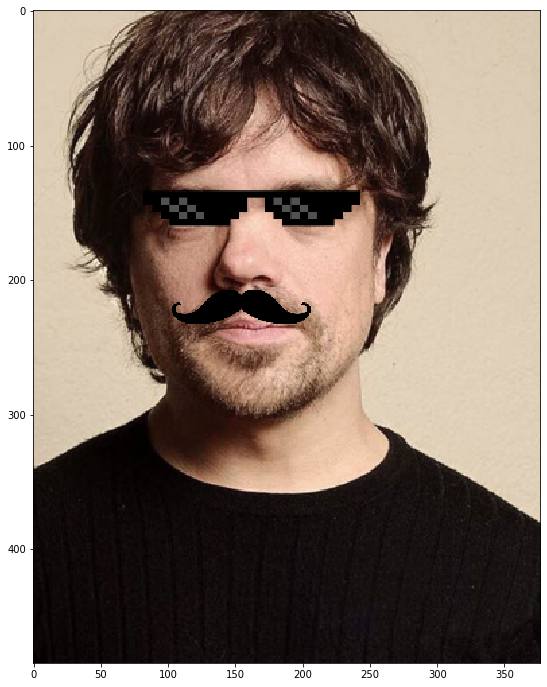

In [10]:
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(frame)
plt.show()

frame = np.array(frame)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2.imwrite("img.jpg", frame)

frame = frame.reshape((-1,3))

df = pd.DataFrame(frame, columns=["Channel 1","Channel 2", "Channel 3"])
df.to_csv("pred.csv", index=False)